# Identification des systèmes

## Introduction

L'identification d'un système consiste à déterminer un modèle mathématique basé sur les entrées et les sorties de ce système. Ce modèle mathématique doit, en principe, lorsqu'il est soumis aux mêmes entrées, répondre de manière équivalente au système.

Il existe différents types de modèles:

- modèles de connaissance: ces modèles sont déterminés grâce aux lois de la physique; ils sont utiles pour simuler précisément les comportements du système mais sont souvent trop complexes pour être utile à l'automaticien
- modèles de conduite: modèle utilisé pour simuler le système dans la plage de fonctionnement utile afin d'aider à la synthèse d'un régulateur

Un modèle peut donc être très différent en fonction des besoins.

En général, on essaie d'établir un modèle simple répondant à nos besoins. Les erreurs de modélisation (modes rapides négligés) et d'identification (erreurs sur le gain, le retard pur...) seront généralement absorbées par la boucle de régulation, d'où l'importance de la robustesse en pratique.

Il existe deux types de méthodes d'identification:

- non paramétrique: le modèle est décrit sous forme de courbe et n'est pas représentable par un ensemble fini de nombres
- paramétrique: le modèle est décrit par un ensemble fini de points (ex: fonction de transfert décrite par les coefficients du numérateur et du dénominateur)

Dans ce chapitre, nous n'étudierons que les méthodes d'identification paramétriques pouvant se mettre sous la forme d'une régression linéaire.

## Prétraitement des signaux

Afin d'effectuer l'identification dans de bonnes conditions, il convient de faire attention aux éléments suivants:

- l'échantillonnage: pour les mêmes raisons que précédemment, la période d'échantillonnage sera choisie telle que $h = T_{95\%}/N$ avec $30 < N < 60$
- filtre antirepliement: il est choisi de telle manière à respecter le théorème de Shannon, soit $\omega_c < 2/h$
- filtrage de la composante continue: le modèle à identifier étant obtenu par la comparaison entre les variations en sortie et en entrée, il est recommandé de filtrer la composante continue via un changement de variable, ou d'utiliser un filtre passe-haut afin de ne garder que les variations
- filtrage des bruits de mesure: si, malgré le filtre antirepliement, le bruit de mesure est toujours présent, il convient d'ajouter un filtre passe-bas de constante de temps $\tau = T_{95\%}/9$

## Classes de modèles

Il existe différentes classes de modèles *standards* pour l'identification. On peut citer, par exemple:

- les modèles sous forme de fonctions de transfert
- les modèles d'état
- les modèles à paramètres distribués

Nous étudierons principalement les modèles représentés par des fonctions de transfert au vu du contenu des chapitres précédents.

De manière générale, les modèles représentés par des fonctions de transfert peuvent être représentés par le schéma général suivant:

<img src="Images/Chapter11/LTI_models.png" width="400">

Le modèle représente:

- le processus à identifier reçoit le signal $U(z)$ et renvoie le signal $Y(z)$
- $G(z)$ représente le processus physique dont $\hat{Y}(z)$ est une estimation
- $E(z)$ représente une perturbation; elle est souvent prise comme un bruit blanc aléatoire
- $H(z)$ est la dynamique de la perturbation; elle permet de mieux identifier les perturbations agissant sur le processus

Voici quelques classes importantes de modèles de cette catégorie.

### Modèle ARX

Le modèle ARX est décrit par l'équation suivante:

$$ y(k) + a_1 y(k-1) + \cdots + a_n y(k-n) = b_1 u(k-1) + \cdots + b_m u(k-m) + e(k) $$

Il représente une équation aux différences entre la sortie et l'entrée, avec un terme représentant l'erreur d'équation.

Il peut être mis sous la forme suivante:

$$Y(z) = \frac{B(z)}{A(z)} U(z) + \frac{1}{A(z)} E(z)$$

### Modèle ARMAX

Le modèle ARMAX est décrit par l'équation suivante:

$$ y(k) + a_1 y(k-1) + \cdots + a_n y(k-n) = b_1 u(k-1) + \cdots + b_m u(k-m) + e(k) + c_1 e(k-1) + \cdots + c_n e(k-l)$$

Il représente une équation aux différences entre la sortie et l'entrée, avec plusieurs termes représentant une moyenne ajustée de la perturbation.

Il peut être mis sous la forme suivante:

$$Y(z) = \frac{B(z)}{A(z)} U(z) + \frac{C(z)}{A(z)} E(z)$$

On peut aussi, en modifiant les termes $U(z)$ et $Y(z)$ par leur différence, ajouter une intégration au modèle. Ce dernier est alors appelé ARIMAX.

Ce modèle, ajoutant de la flexibilité dans la description des perturbations par rapport au modèle ARX, est devenu le standard le plus utilisé pour le contrôle et l'économétrie (branche étudiant les modèles en économie).

### Modèle de Box-Jenkins

Le modèle de Box-Jenkins est décrit par l'équation suivante:

$$Y(z) = \frac{B(z)}{A(z)} U(z) + \frac{C(z)}{A(z)} E(z)$$

Ce modèle est très complet car il sépare entièrement la dynamique du processus de la dynamique de la perturbation.

## Régression linéaire

La régression linéaire est définie par l'équation vectorielle suivante:

$$ y(k) = \phi (k) \vartheta + \varepsilon (k) $$

Dans cette équation, $y(k) \in \mathbb{R}^N$ est le vecteur de mesures, $\vartheta \in \mathbb{R}^p$ est le vecteur de paramètres et $\varepsilon (k) \in \mathbb{R}^N$ est le vecteur d'erreurs; $\phi (k) \in \mathbb{R}^{N \times p}$ est la matrice d'observations.

Cette équation, qui est une simple équation de droite lorsque la taille des vecteurs vaut 2, permet de modéliser une grande quantité de problèmes physiques.

#### Exemple 1
Prenons la fonction de transfert à identifier suivante:

$$ G(s) = \frac{\gamma}{\tau s + 1} $$

La réponse impulsionnelle fourni la sortie temporelle suivante:

$$ y(t) = \mathscr{L}^{-1} \left( G(s) \right) = \frac{\gamma}{\tau} e^{-\frac{t}{\tau}} $$

En passant par le logarithme, on obtient:

$$ \ln \left( \frac{\gamma}{\tau} e^{-\frac{t}{\tau}} \right) = -\frac{t}{\tau} + \ln \frac{\gamma}{\tau} $$

Cette dernière équation devient donc une droite avec:

- $y = \ln \left( \frac{\gamma}{\tau} e^{-\frac{t}{\tau}} \right)$
- $a = -\frac{1}{\tau}$
- $b = \ln \frac{\gamma}{\tau}$

En relevant suffisamment de points, on peut écrire la régression suivante:

$$
\left[
\begin{array}{ccc}
  \ln y(0) \\
  \ln y(h) \\
  \vdots \\
  \ln y(kh)
\end{array}
\right]
=
\left[
\begin{array}{ccc}
  0 & 1 \\
  h & 1 \\
  \vdots \\
  kh & 1
\end{array}
\right]
\times
\left[
\begin{array}{ccc}
  a \\
  b
\end{array}
\right]
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math
import random

import control
from scipy import stats

In [2]:
def add_noise(y_list, k=1):
    for i, y in enumerate(y_list):
        x1, x2 = random.random(), random.random()
        z = math.sqrt(-2 * math.log(x1)) * math.cos(2 * math.pi * x2)

        y_list[i] += k * z

In [3]:
gamma = 2.3
tau = 10.25

G = control.tf(gamma, [tau, 1])

time, yout = control.impulse_response(G, [i * 10 for i in range(10)])
    
y_ln = [math.log(y) for y in yout]

# add Box Muller noise to y
add_noise(y_ln, k=1)  # change to 0.1, 0.01
    
# compute linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(time, y_ln)

y_lsq = [slope * t + intercept for t in time]

gamma_lsq = - math.exp(intercept) / slope
tau_lsq = -1 / slope

print('Estimated gamma : {}'.format(gamma_lsq))
print('Estimated tau : {}'.format(tau_lsq))

Estimated gamma : 2.063271458948316
Estimated tau : 10.69844038787513


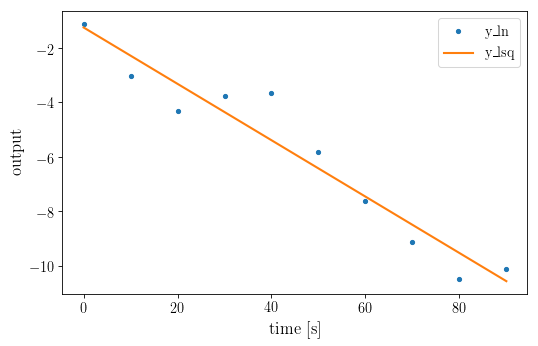

In [61]:
fig, ax = plt.subplots()
ax.plot(time, y_ln, '.', label='y\_ln')
ax.plot(time, y_lsq, '-', label='y\_lsq')
ax.set_xlabel('time [s]')
ax.set_ylabel('output')
_ = ax.legend()

Cette méthode peut sembler intéressante, mais une impulsion de Dirac est en pratique, difficile à mettre en oeuvre.

***

Ce chapitre n'étant qu'une introduction à l'identification, seul le modèle ARX, pouvant être décrit par une régression linéaire, sera étudié.

## Application à l'identification des systèmes dynamiques

Un système dynamique est décrit naturellement par une équation différentielle, éventuellement non-linéaire. Cette dernière doit alors être linéarisée autour du point de fonctionnement choisi afin d'appliquer les techniques du présent chapitre.

Nous avons vu qu'un modèle continu linéaire peut aisément être numérisé par échantillonnage:

$$ G(z) = (1-z^{-1}) \mathscr{Z} \left\{ \mathscr{L}^{-1} \left( \frac{G(s)}{s} \right) \right\} $$

La fonction de transfert ainsi obtenue possède la forme générale suivante:

$$ G(z) = \frac{b_0 z^{n-1} + b_1 z^{n-2} + \dots + b_{n-1}}{z^n + a_1 z^{n-1} + \dots + a_n} $$

Ce système possède un surplus de pôle de 1. Si, en réalité, le surplus de pôle est plus grand, il suffit d'annuler les premiers termes du numérateur.

En remettant cette fonction de transfert sous la forme d'une équation aux différence, on obtient:

$$ y(k) = -a_1 y(k-1) - \dots - a_n y(k-n) + b_0 u(k-1) + b_1 u(k-2) + \dots + b_{n-1} u(k-n) $$

En y ajoutant un terme représentant l'erreur, on obtient:

$$ y(k) = -a_1 y(k-1) - \dots - a_n y(k-n) + b_0 u(k-1) + b_1 u(k-2) + \dots + b_{n-1} u(k-n) + \varepsilon (k) $$

Ce qui correspond à un modèle ARX.

Cette équation peut être remise sous la forme vectorielle suivante:

$$ y(k) =
\left[
\begin{array}{cccccccc}
  -y(k-1) & -y(k-2) & \cdots & -y(k-n) & u(k-1) & u(k-2) & \cdots & u(k-n)
\end{array}
\right]
\left[
\begin{array}{c}
  a_1 \\
  a_2 \\
  \vdots \\
  a_n \\
  b_0 \\
  b_1 \\
  \vdots \\
  b_{n-1}
\end{array}
\right]
+ \varepsilon (k)
$$

Afin de pouvoir lisser les incertitudes, perturbations et erreurs de modélisations, il faut prendre suffisamment d'échantillons pour que notre régression soit la plus fidèle possible.

Prenons $k = 1, 2, \cdots, k$, avec des entrées et des conditions initiales nulles avant $k=0$ pour $k > 2n$:

$$
\underbrace{
    \left[
    \begin{array}{c}
      y(1) \\
      y(2) \\
      \vdots \\
      y(n) \\
      \vdots \\
      y(2n) \\
      \vdots \\
      y(k)
    \end{array}
    \right]
}_{y(k)}
=
\underbrace{
    \left[
    \begin{array}{cccccccc}
      -y(0) & 0 & \cdots & 0 & u(0) & 0 & \cdots & 0 \\
      -y(1) & -y(0) & \cdots & 0 & u(1) & u(0) & \cdots & 0 \\
      \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
      -y(n) & -y(n-1) & \cdots & -y(0) & u(n-1) & u(n-2) & \cdots & u(0) \\
      \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
      -y(2n-1) & -y(2n-2) & \cdots & -y(n) & u(2n-1) & u(2n-2) & \cdots & u(n) \\
      \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
      -y(k-1) & -y(k-2) & \cdots & -y(k-n) & u(k-1) & u(k-2) & \cdots & u(k-n)
    \end{array}
    \right]
}_{\phi(k-1)}
\underbrace{
    \left[
    \begin{array}{c}
      a_1 \\
      a_2 \\
      \vdots \\
      a_n \\
      b_0 \\
      b_1 \\
      \vdots \\
      b_{n-1}
    \end{array}
    \right]
}_{\vartheta}
+
\underbrace{
    \left[
    \begin{array}{c}
      \varepsilon (1) \\
      \varepsilon (2) \\
      \vdots \\
      \varepsilon (n) \\
      \vdots \\
      \varepsilon (2n) \\
      \vdots \\
      \varepsilon (k)
    \end{array}
    \right]
}_{\varepsilon (k)}
$$

On obtient donc la régression suivante:

$$ y(k) = \phi (k-1) \vartheta + \varepsilon (k) $$

avec $k > 2n$, $2n$ étant le nombre de paramètres à identifier.

Dans le cas particulier d'une intégrale dans le processus, il est possible d'identifier la dérivée de la grandeur qui nous intéresse, puis d'ajouter l'intégrale dans le modèle obtenu.

## Identification paramétrique pour un modèle linéaire

Il existe différentes méthodes d'estimation des paramètres. Citons, par exemple:

- les méthodes des moindres carrés
- les méthodes basées sur le maximum de vraisemblance
- les méthodes basées sur le gradient
- les méthodes basées sur la variable instrumentale

Seules les méthodes des moindres carrés seront étudiées pour leur simplicité de mise en oeuvre.

### Méthode des moindres carrés

Reprenons la régression linéaire:

$$ y(k) = \phi (k) \vartheta + \varepsilon (k) $$

L'idée est de minimiser le vecteur $\varepsilon(k)$ en minimisant le carré de la norme euclidienne du vecteur :

$$ J(\vartheta) = \| \varepsilon (k)^2 \| = \varepsilon^T (k) \varepsilon (k) = \left( y(k) - \phi(k) \vartheta \right)^T \left( y(k) - \phi(k) \vartheta \right) $$

Le vecteur permettant de minimiser $J(\vartheta)$ est appelé vecteur des paramètres estimé $\hat{\vartheta}(k)$ en prenant compte de l'instant $t_k=kh$.

#### Théorème 11.1
En supposant que la matrice d'observations $\phi(k)$ soit de rang p, le vecteur de paramètres estimé est unique et donné par:

$$ \hat{\vartheta}(k) = \left( \phi^{T}(k) \phi(k) \right)^{-1} \phi^{T}(k) y(k)  $$

***

Cette méthode part donc du principe que toutes les mesures ont été effectuées en amont, puis qu'on utilise l'algorithme *hors ligne* afin d'estimer les paramètres du processus.

### Méthode des moindres carrés récurrents

Si l'identification doit être effectuée *en ligne*, c'est-à-dire que l'on veut tenir compte des nouvelles mesures lorsqu'elles sont disponibles, la méthode précédente n'est pas efficace.

L'idée va être d'essayer de tenir compte de l'estimation déjà présente afin de calculer la prochaine estimation. Pour cela on défini la régression linéaire à l'instant $t_{k+1} = (k+1)h$:

$$ y(k+1) = \phi (k+1) \vartheta + \varepsilon (k+1) $$

Les termes sont redéfinis de la manière suivante, les termes en gras représentant des vecteurs ou matrices:

\begin{align}
  & \mathbf{y}(k+1) = 
  \left[
  \begin{array}{c}
    \mathbf{y}(k) \\
    y(k+1)
  \end{array}
  \right] \, \in \, \mathbb{R}^{N+1} \\
  & \boldsymbol{\phi}(k+1) = 
  \left[
  \begin{array}{c}
    \boldsymbol{\phi}(k) \\
    \phi(k+1)
  \end{array}
  \right] \, \in \, \mathbb{R}^{(N+1)\times p} \\
  & \boldsymbol{\varepsilon}(k+1) = 
  \left[
  \begin{array}{c}
    \boldsymbol{\varepsilon}(k) \\
    \varepsilon(k+1)
  \end{array}
  \right] \, \in \, \mathbb{R}^{N+1}
\end{align}

#### Théorème 11.2
En supposant que la matrice d'observations $\phi(k)$ soit de rang p, le vecteur de paramètres estimé vérifie l'équation récurrente:

$$ \boldsymbol{\hat{\vartheta}}(k+1) = \boldsymbol{\hat{\vartheta}}(k) + \mathbf{K}(k+1) \left( y(k+1) - \phi^T(k+1) \boldsymbol{\hat{\vartheta}}(k) \right) $$

avec:

$$ \mathbf{K}(k+1) = \frac{\mathbf{P}(k)\phi(k+1)}{1+\phi^T(k+1)\mathbf{P}(k)\phi(k+1)} \, \in\, \mathbb{R}^p $$

$$ \mathbf{P}(k+1) = \left( \mathbf{I} - \mathbf{K}(k+1) \phi^T(k+1) \right) \mathbf{P}(k)\, \in \, \mathbb{R}^{p\times p} $$

***

En pratique, on choisit $\hat{\vartheta}(0) = 0$ et $P(0) = \alpha I$, avec $\alpha$ très grand; par exemple $\alpha = 10^4$.

### Méthode des moindres carrés pondérés

Lors du processus d'identification, des soucis peuvent apparaître:

- certaines mesures sont très mauvaises
- le processus varie un peu en fonction du temps et les échantillons plus anciens deviennent moins pertinents

Dans ces conditions, il est préférable de donner moins de poids aux échantillons identifiés comme moins pertinents.

Une solution à ce problème consiste à introduire une matrice de pondération $W(k) \in \mathbb{R}^{N \times N}$ telle que:

\begin{align}
  J(\vartheta) &= \| \varepsilon(k) \|^2_{W(k)} \\
  &= \varepsilon^T(k) W(k) \varepsilon(k) \\
  &= \left( y(k) - \phi(k) \vartheta \right)^T W(k) \left( y(k) - \phi(k) \vartheta \right)
\end{align}

Le vecteur $\hat{\vartheta}(k)$ minimisant ce nouveau critère est donné par le théorème suivant.

#### Théorème 11.3
En supposant que la matrice d'observations $\phi(k)$ soit de rang p et que la matrice de pondération $W(k)$ soit symétrique et définie positive, le vecteur de paramètres estimé qui minimise $J(\vartheta)$ est unique et donné par:

$$ \hat{\vartheta}(k) = \left( \phi^{T}(k) W(k) \phi(k) \right)^{-1} \phi^{T}(k) W(k) y(k)  $$

***

La matrice de pondération $W(k)$ est souvent choisie diagonale de la forme suivante:

$$ W(k) = 
\left[
\begin{array}{ccccc}
  \lambda^{k-1} & 0 & \cdots & 0 & 0 \\
  0 & \lambda^{k-2} & \cdots & 0 & 0 \\
  \vdots & \vdots & \vdots & \vdots & \vdots \\
  0 & 0 & \cdots & \lambda & 0 \\
  0 & 0 & \cdots & 0 & 1
\end{array}
\right] \qquad \text{avec}\; 0 < \lambda < 1
$$

Le critère devient, en développant:

$$ J(\vartheta) = \lambda^{k-1} \varepsilon^2(1) + \lambda^{k-2} \varepsilon^2(2) + \cdots + \lambda \varepsilon^2(k-1) +  \varepsilon^2(k) $$

Le terme $\lambda$, appelé facteur d'oubli, est en pratique pris dans l'intervalle $[0.95, 0.995]$.

### Méthode des moindres carrés pondérés récurrents

La version récurrente des moindres carrés pondérés demande de redéfinir la matrice de pondération ainsi que le critère à minimiser de la manière suivante:

$$ J(\vartheta) = \| \varepsilon(k+1) \|^2_{W(k+1)} $$

$$ \mathbf{W}(k+1) = 
\left[
\begin{array}{cc}
  \mathbf{W}(k) & \mathbf{0} \\
  \mathbf{0}^T & w(k+1)
\end{array}
\right]
$$

A nouveau, les termes en gras représentent des vecteurs ou des matrices.

#### Théorème 11.4
En supposant que la matrice d'observations $\phi(k)$ soit de rang p et que la matrice de pondération $W(k+1)$ soit diagonale et définie positive, le vecteur de paramètres estimé vérifie l'équation récurrente:

$$ \boldsymbol{\hat{\vartheta}}(k+1) = \boldsymbol{\hat{\vartheta}}(k) + \mathbf{K}(k+1) \left( y(k+1) - \phi^T(k+1) \boldsymbol{\hat{\vartheta}}(k) \right) $$

avec:

$$ \mathbf{K}(k+1) = \frac{\mathbf{P}(k)\phi(k+1)}{\frac{1}{w(k+1)}+\phi^T(k+1)\mathbf{P}(k)\phi(k+1)} \, \in\, \mathbb{R}^p $$

$$ \mathbf{P}(k+1) = \left( \mathbf{I} - \mathbf{K}(k+1) \phi^T(k+1) \right) \mathbf{P}(k)\, \in \, \mathbb{R}^{p\times p} $$

***

Si la matrice de pondération est définie comme précédemment, on peut écrire:

$$ \mathbf{W}(k+1) 
\left[
\begin{array}{cccccc}
  \lambda^{k} & 0 & \cdots & 0 & 0 & 0 \\
  0 & \lambda^{k-1} & \cdots & 0 & 0 & 0 \\
  \vdots & \vdots & \vdots & \vdots & \vdots \\
  0 & 0 & \cdots & \lambda^2 & 0 & 0 \\
  0 & 0 & \cdots & 0 & \lambda & 0 \\
  0 & 0 & \cdots & 0 & 0 & 1
\end{array}
\right]
= \lambda
\left[
\begin{array}{cccccc}
  \lambda^{k-1} & 0 & \cdots & 0 & 0 & 0 \\
  0 & \lambda^{k-2} & \cdots & 0 & 0 & 0 \\
  \vdots & \vdots & \vdots & \vdots & \vdots \\
  0 & 0 & \cdots & \lambda & 0 & 0 \\
  0 & 0 & \cdots & 0 & 1 & 0 \\
  0 & 0 & \cdots & 0 & 0 & \frac{1}{\lambda} \\
\end{array}
\right]
= \lambda
\left[
\begin{array}{cc}
  \mathbf{W}(k) & \mathbf{0} \\
  \mathbf{0}^T & \frac{1}{\lambda}
\end{array}
\right]
$$

#### Théorème 11.5
En supposant que la matrice d'observations $\phi(k)$ soit de rang p et que la matrice de pondération $W(k+1)$ soit définie comme précédemment, le vecteur de paramètres estimé vérifie l'équation récurrente:

$$ \boldsymbol{\hat{\vartheta}}(k+1) = \boldsymbol{\hat{\vartheta}}(k) + \mathbf{K}(k+1) \left( y(k+1) - \phi^T(k+1) \boldsymbol{\hat{\vartheta}}(k) \right) $$

avec:

$$ \mathbf{K}(k+1) = \frac{\mathbf{P}(k)\phi(k+1)}{\lambda+\phi^T(k+1)\mathbf{P}(k)\phi(k+1)} \, \in\, \mathbb{R}^p $$

$$ \mathbf{P}(k+1) = \left( \mathbf{I} - \mathbf{K}(k+1) \phi^T(k+1) \right) \frac{\mathbf{P}(k)}{\lambda}\, \in \, \mathbb{R}^{p\times p} $$

***

## Séquence d'entrée utilisée pour l'identification

Afin d'identifier au mieux le processus, il faut pouvoir observer le maximum de ses modes. Cependant, il ne faut pas non plus trop perturber le fonctionnement nominal du processus. Il importe donc de choisir une entrée possédant un large spectre fréquentiel, tout en ayant une moyenne nulle.

Le signal binaire pseudo aléatoire (*PRBS* en anglais) est devenu le signal préféré pour cette tâche. Il consiste en un signal carré dont la fréquence varie tout au long de l'essai d'identification. Ce signal est ajouté au signal d'entrée utile.

Il est souvent généré par un registre à décalage de $N$ bits. La sortie, avant d'être recopiée en entrée du registre, subit une opération $XOR$ avec un bit d'indice $i$. Le principe est illustré dans la figure suivante:

<img src="Images/Chapter11/PRBS_realization.png" width="400">

La longueur d'une séquence générée de cette manière est notée $L = 2^N - 1$.

Le tableau suivant donne les caractéristiques d'un SBPA en fonction du nombre de bits:

|||||||||||
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $N$ | $2$ | $3$ | $4$ | $5$ | $6$ | $7$ | $8$ | $9$ | $10$ |
| $L$ | $3$ | $7$ | $15$ | $31$ | $63$ | $128$ | $255$ | $511$ | $1023$ |
| $i$ | $1$ | $2$ | $3$ | $3$ | $5$ | $4$ | $2,3,4$ | $5$ | $7$ |

En pratique, il faut choisir les grandeurs suivantes:

- le signal prend les valeurs $[-a, a]$ autour du point de fonctionnement avec $\|a\|$ plus grand que le bruit
- la durée maximale d'un créneau étant de $NT_h$ avec $T_h$ la période d'horloge du SBPA, il faut $NT_h > T_m$ avec $T_m$ le temps de montée du système
- la durée de l'essai doit respecter la condition $T_e > (2^N-1) T_h$ afin de balayer tout le spectre de fréquences
- $T_h$ est souvent pris comme un multiple de la période d'échantillonnage $h$

In [4]:
def generate_prbs(a, n=8, te=None):
    i_dict = {
        2: (1,),
        3: (2,),
        4: (3,),
        5: (3,),
        6: (5,),
        7: (4,),
        8: (2, 3, 4,),
        9: (5,),
        10: (7,),
    }
    
    l = 2 ** n - 1
    i_list = i_dict[n]
    
    if te is None or te <= l:
        te = l + 1
    
    register = l
    
    for j in range(te):
        signal = (register & (2 ** (n - 1))) >> (n - 1)
        yield a if signal else -a
        
        for i in i_list:
            signal ^= (register & (2 ** (i - 1))) >> (i - 1)
            
        register <<= 1
        register &= l
        register |= signal

In [5]:
n = 5
te = 2 ** n + 1
prbs = list(generate_prbs(2, n, te))
time = [i for i, _ in enumerate(prbs)]

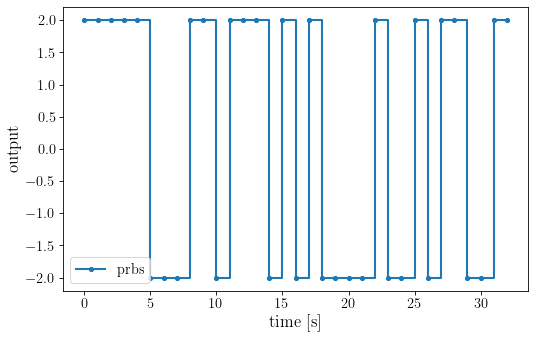

In [6]:
fig, ax = plt.subplots()
ax.step(time, prbs, '.-', where='post', label='prbs')
ax.set_xlabel('time [s]')
ax.set_ylabel('output')
_ = ax.legend()

## Exemple

Soit le système décrit par l'équation suivante, avec $h=0.025\, \mathrm{s}$:

$$ G(z) = \frac{b}{z+a} $$

avec $a$ variant brusquement de $[-1, -0.9]$ et $b$ de $[0.095, 0.1]$.

Appliquer les différentes méthodes d'identification sur ce système.

### Simulation du système soumis à la SPBA

In [7]:
import numpy as np
from scipy import signal

def generate_coeff(t, coeff_min, coeff_max):
    transform = (coeff_min - coeff_max) / 2
    
    return transform * (signal.square(2 * np.pi / time[-1] * t) + 1) + coeff_max

def process(y, u, t):
    a = generate_coeff(t, -1, -0.9)
    b = generate_coeff(t, 0.095, 0.1)
    
    y_k = -a * y + b * u
    
    return y_k

In [8]:
h = 0.025

# rising time taking the mean of a
tm = -5 / (math.log(0.9) / h)

# setup the prbs
q = 7
th = q * h
n = int(tm / th)

n_points = 1 * (2 ** n)

ticks = [i for i in range(q * n_points)]
time = [t * h for t in ticks]

# initialise y and u for k = 0
y_list = [0]
u_gen = generate_prbs(1, n, te=n_points)

u_list = [next(u_gen)]

# run the simulation
for t in ticks[1:]:
    y = process(y_list[-1], u_list[-1], t * h)
    # compute the new prbs value, knowing th = q * h
    if not t % q:
        u = next(u_gen)
    else:
        u = u_list[-1]
    y_list.append(y)
    u_list.append(u)
    
# add Box Muller noise to y
add_noise(y_list, k=0.1)  # change to 0.1, 0.01

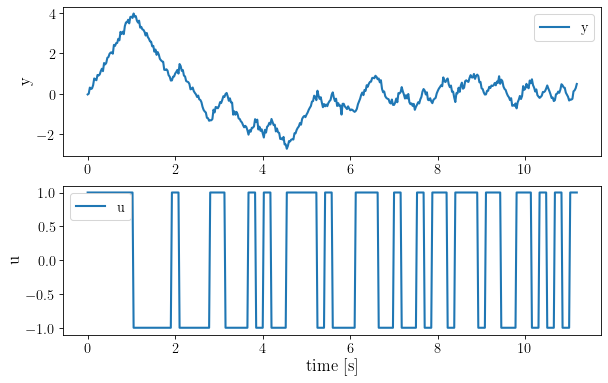

In [9]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(time, y_list, '-', label='y')
axs[1].plot(time, u_list, '-', label='u')
axs[0].set_ylabel('y')
axs[1].set_ylabel('u')
axs[1].set_xlabel('time [s]')
_ = axs[0].legend()
_ = axs[1].legend()

### Identification avec la méthode des moindres carrés

In [10]:
def ls_estimate(u_list, y_list):
    y = np.array(y_list[1:])
    
    phi = np.zeros((len(y), 2))
    
    for i, row in enumerate(phi):
        row[0] = -y_list[i]
        row[1] = u_list[i]
    
    theta = np.linalg.inv(phi.transpose() @ phi) @ phi.transpose() @ y
    
    return theta

In [11]:
theta = ls_estimate(u_list, y_list)

print("The parameter's estimation using LS method is:")
print("a = {}".format(theta[0]))
print("b = {}".format(theta[1]))

The parameter's estimation using LS method is:
a = -0.9874482342110191
b = 0.0943093839449056


Afin de mieux apprécier l'estimation, affichons les paramètres $a$ et $b$ en fonction du temps:

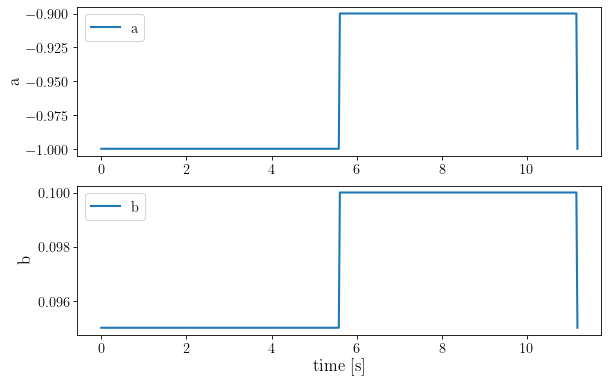

In [12]:
a_list = generate_coeff(np.array(time), -1, -0.9)
b_list = generate_coeff(np.array(time), 0.095, 0.1)

fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(time, a_list, '-', label='a')
axs[1].plot(time, b_list, '-', label='b')
axs[0].set_ylabel('a')
axs[1].set_ylabel('b')
axs[1].set_xlabel('time [s]')
_ = axs[0].legend()
_ = axs[1].legend()

### Identification avec la méthode des moindres carrés pondérés

In [13]:
def wls_estimate(u_list, y_list, l=0.9):
    y = np.array(y_list[1:])
    
    phi = np.zeros((len(y), 2))
    w = np.eye(len(y))
    
    for i, row in enumerate(phi):
        row[0] = -y_list[i]
        row[1] = u_list[i]
        w[i][i] = l ** (len(y) - i - 1)
    
    theta = np.linalg.inv(phi.T @ w @ phi) @ phi.T @ w @ y

    return theta

In [14]:
theta = wls_estimate(u_list, y_list, l=0.85)

print("The parameter's estimation using WLS method is:")
print("a = {}".format(theta[0]))
print("b = {}".format(theta[1]))

The parameter's estimation using WLS method is:
a = -0.9263750219179656
b = 0.1236226864434226


### Identification avec la méthode des moindres carrés récurrents

In [15]:
def rls_estimate(u_list, y_list, a=10**4):
    theta = np.array([0, 0]).reshape((2, 1))
    p = a * np.eye(2)   
    
    for i, y in enumerate(y_list[1:]):
        phi = np.array([-y_list[i], u_list[i]]).reshape((2, 1))
        k = (p @ phi) / (1 + phi.T @ p @ phi)
        p = (np.eye(2) - k @ phi.T) @ p
        theta = theta + k * (y - phi.T @ theta)
                        
    return theta

In [16]:
theta = rls_estimate(u_list, y_list)

print("The parameter's estimation using RLS method is:")
print("a = {}".format(theta[0]))
print("b = {}".format(theta[1]))

The parameter's estimation using RLS method is:
a = [-0.9874481]
b = [0.09430937]


### Identification avec la méthode des moindres carrés pondérés récurrents

In [17]:
def wrls_estimate(u_list, y_list, a=10**4, l=0.9):
    theta = np.array([0, 0]).reshape((2, 1))
    p = a * np.eye(2)

    for i, y in enumerate(y_list[1:]):
        phi = np.array([-y_list[i], u_list[i]]).reshape((2, 1))
        k = (p @ phi) / (l + phi.T @ p @ phi)
        p = (np.eye(2) - k @ phi.T) @ (p / l)
        theta = theta + k * (y - phi.T @ theta)        
        
    return theta

In [18]:
theta = wrls_estimate(u_list, y_list, l=0.85)

print("The parameter's estimation using WRLS method is:")
print("a = {}".format(theta[0]))
print("b = {}".format(theta[1]))

The parameter's estimation using WRLS method is:
a = [-0.92637502]
b = [0.12362269]
